# Script de clusterização para as bases de dados do ENEM - Algoritmo KMeans

**Autor**: Rafael Victor Araujo Bernardes - rafaelvictor.bernardes@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [2]:
# Variáveis de controle

# ano = '2019'
# ano = '2022'
# ano = '2020'
# ano = '2022'
ano = '2023'

DATASET_ENEM_PATH = 'D:\BASES_PRE_PROCESSADAS\PRE_PROCESSADOS_ENEM_' + ano + '.csv'

In [3]:
microdadosEnem = pd.read_csv(DATASET_ENEM_PATH, sep=',', encoding='ISO-8859-1')

In [4]:
microdadosEnem.shape

(2678264, 168)

In [5]:
microdadosEnem.head()

,MEDIA_NOTAS,TP_FAIXA_ETARIA_1,TP_FAIXA_ETARIA_2,TP_FAIXA_ETARIA_3,TP_FAIXA_ETARIA_4,TP_FAIXA_ETARIA_5,TP_FAIXA_ETARIA_6,TP_FAIXA_ETARIA_7,TP_FAIXA_ETARIA_8,TP_FAIXA_ETARIA_9,...,Q024_C,Q024_D,Q024_E,Q025_A,Q025_B,MACRO_REGIAO_CENTRO_OESTE,MACRO_REGIAO_NORDESTE,MACRO_REGIAO_NORTE,MACRO_REGIAO_SUDESTE,MACRO_REGIAO_SUL
0,507.94,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,564.28,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,425.38,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,617.12,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,697.66,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,True,False,False,False


### Identificando o melhor número possivel de K`s

Utilizando o método do cotovelo (Elbow Method) para determinar o valor de K 

In [6]:
aux_n_init = 1
aux_max_iter = 10

In [7]:
valores_k = []
inercias = []

colunas_para_kmeans = [col for col in microdadosEnem.columns if col not in ['MEDIA_NOTAS']]

# Percorrendo diferentes valores de k para k entre 1 e 10
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=aux_n_init, max_iter=aux_max_iter, random_state=72769).fit(microdadosEnem[colunas_para_kmeans])

    valores_k.append(k)
    inercias.append(kmeans.inertia_)
    print(f'{k:d}) {kmeans.inertia_}')

1) 43808605.36994996
2) 39321166.60556573
3) 37896646.69804661
4) 36858334.49456185
5) 36089798.66291453
6) 35574446.436636634
7) 35121593.893559866
8) 34931630.8924562
9) 34693535.9002419


In [ ]:
# fig, ax = plt.subplots()

# ax.plot(valores_k, inercias)

# plt.show()

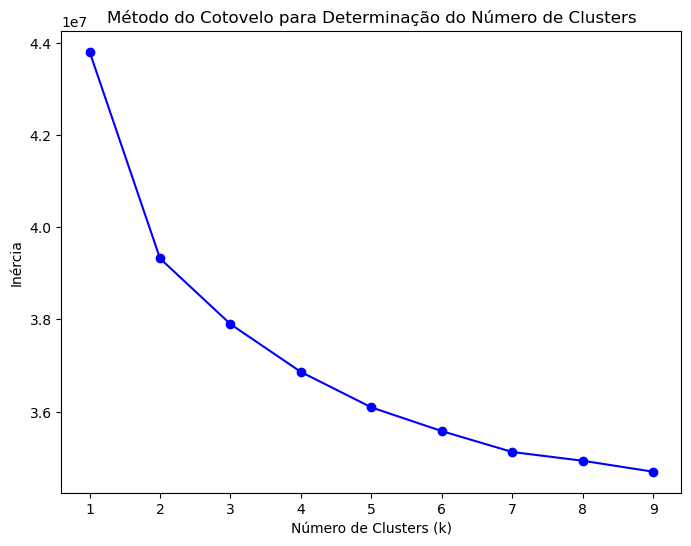

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho do gráfico se necessário

# Definindo o título e os rótulos dos eixos
ax.set_title('Método do Cotovelo para Determinação do Número de Clusters')
ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Inércia')

# Plotando os pontos e a linha
ax.plot(valores_k, inercias, marker='o', linestyle='-', color='blue')

plt.show()

In [ ]:
n_clusters = 5

In [ ]:
kmeans = KMeans(n_clusters=n_clusters, n_init=aux_n_init, max_iter=aux_max_iter, random_state=72769).fit(microdadosEnem)

In [ ]:
microdadosEnem['K_Cluster'] = kmeans.labels_
microdadosEnem.head()

In [ ]:
# Iterando sobre as colunas e clusters

total_linhas_tabela = microdadosEnem.shape[0]

for coluna in microdadosEnem.drop('K_Cluster', axis=1).columns:
    for cluster in np.sort(microdadosEnem.K_Cluster.unique()): # 0, 1, 2, 3, ou 4

        if coluna == 'MEDIA_NOTAS':
            media = microdadosEnem.loc[microdadosEnem.K_Cluster == cluster, coluna].mean()
            print(f'{cluster:d};{coluna};{media:.4f}'.replace('.', ','))

        else:
            registros_do_cluster = microdadosEnem.loc[microdadosEnem.K_Cluster == cluster, coluna].sum()
            porcentagem = (registros_do_cluster * 100) / total_linhas_tabela
            print(f'{cluster:d};{coluna};{porcentagem:.4f}%'.replace('.', ','))
     
    
# Iterando sobre as colunas para o caso geral
for coluna in microdadosEnem.drop('K_Cluster', axis=1).columns:
    
    if coluna == 'MEDIA_NOTAS':
        media = microdadosEnem.loc[:, coluna].mean()
        print(f'All;{coluna};{media:.4f}'.replace('.', ','))

    else:
        registros_da_tabela = microdadosEnem.loc[:, coluna].sum()
        porcentagem = (registros_da_tabela * 100) / total_linhas_tabela
        print(f'All;{coluna};{porcentagem:.4f}%'.replace('.', ','))